In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('data.csv', names=col_names, header=0)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = df.label
x = df.drop(['label'], axis=1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

In [6]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_predict = log_reg.predict(x_test)

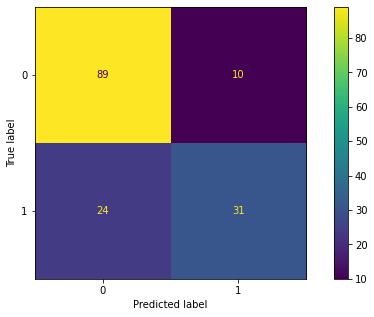

In [7]:
# Confusion matrix
# (0, 0) - TN (True Negative)
# (0, 1) - FN (False Negative)
# (1, 0) - FP (False Positive)
# (1, 1) - TP (True Positive)
matrix_display = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_predict)).plot()
matrix_display;

In [8]:
# (TP + TN) / (TP + TN + FP + FN)
print(f'Accuracy = {metrics.accuracy_score(y_test, y_predict):.2f}')
# TP / (TP + FP)
print(f'Precision = {metrics.precision_score(y_test, y_predict):.2f}')
# TP / (TP + FN)
print(f'Recall = {metrics.recall_score(y_test, y_predict):.2f}')

Accuracy = 0.78
Precision = 0.76
Recall = 0.56
